<a href="https://colab.research.google.com/github/carlosqu/TesisUniandes/blob/master/Notebook_Tesis_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import figure
from matplotlib import *
import sys
from pylab import *
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
data=pd.read_excel('/content/drive/My Drive/tesis/Universidad de los andes/Luis Francisco Ortiz Santamaria - Balance Demanda/Datos/EIA/Importaciones Refinerias/DF_2000.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
DATE                        233 non-null datetime64[ns]
AVG_API                     233 non-null float64
AVG_AZUFRE                  233 non-null float64
PERCENT_UTILIZACION_PADD    233 non-null float64
CAPACIDAD                   233 non-null int64
API_PROMEDIO_PADD           233 non-null float64
KBD_MONTH                   233 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 12.8 KB


In [5]:
data['Date_Time'] = pd.to_datetime(data.DATE , format = '%m/%d/%Y')
data.index = data.Date_Time
data = data.drop(['Date_Time'], axis=1)
data = data.drop(['DATE'], axis=1)
data.head()

,AVG_API,AVG_AZUFRE,PERCENT_UTILIZACION_PADD,CAPACIDAD,API_PROMEDIO_PADD,KBD_MONTH
Date_Time,,,,,,
2000-01-31,19.541818,2.868312,86.5,7553,31.08,1322.741935
2000-02-29,19.345584,2.833247,87.9,7546,31.42,1519.413793
2000-03-31,19.841379,2.866092,91.5,7548,31.23,1448.129032
2000-04-30,19.304146,2.794390,93.1,7548,31.21,1498.666667
2000-05-31,19.436709,2.890127,94.9,7548,31.65,1446.709677


## **Modelo NN univariado**

In [0]:
uni=data[['KBD_MONTH']]

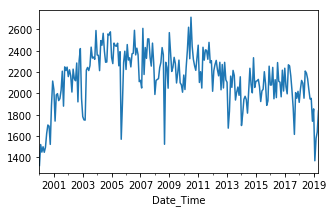

In [7]:
uni = uni.sort_index()
plt.figure(figsize=(5, 3))
uni['KBD_MONTH'].plot()

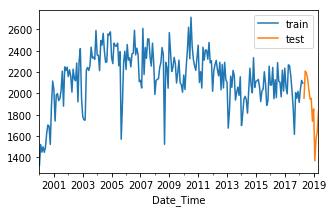

In [8]:
split_date = pd.Timestamp('2018-05-01')
df =  uni['KBD_MONTH']
train = df.loc[:split_date]
test = df.loc[split_date:]
plt.figure(figsize=(5, 3))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

In [0]:
scaler = MinMaxScaler(feature_range=(-1, 1))

In [0]:
train=train.values.reshape(-1,1)
train_sc = scaler.fit_transform(train)
test=test.values.reshape(-1,1)
test_sc = scaler.transform(test)

In [0]:
np.random.shuffle(train_sc)

In [0]:
X_train = train_sc[:-1]
y_train = train_sc[1:]
X_test = test_sc[:-1]
y_test = test_sc[1:]

In [14]:
nn_model = Sequential()
nn_model.add(Dense(100, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1,callbacks=[early_stop] ,shuffle=False)



Epoch 1/100
219/219 [==============================] - 5s 23ms/step - loss: 0.1332
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 0.1299
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.1294
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 0.1291
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 0.1289
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 0.1287
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 0.1286
Epoch 8/100
219/219 [==============================] - 1s 3ms/step - loss: 0.1285
Epoch 9/100
219/219 [==============================] - 1s 3ms/step - loss: 0.1284
Epoch 10/100
219/219 [==============================] - 1s 3ms/step - loss: 0.1283
Epoch 11/100
219/219 [==============================] - 1s 4ms/step - loss: 0.1283
Epoch 12/100
219/219 [==============================] - 1s 4ms/step - loss: 0.1282
Epoch 13/1

In [15]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

The R2 score on the Train set is:	0.029
The R2 score on the Test set is:	-0.845


In [0]:
nn_y_pred_test = nn_model.predict(X_test)

In [17]:
nn_test_mse = nn_model.evaluate(X_test, y_test, batch_size=1)
print('NN: %f'%nn_test_mse)

12/12 [==============================] - 0s 5ms/step
NN: 0.235329


In [0]:
test_predict = scaler.inverse_transform(y_pred_test_nn)
test = df.loc[split_date:]
test=test.values.reshape(-1,1)
y_test = test[1:]

In [19]:
print(np.sqrt(mean_squared_error(y_test,y_pred_test_nn)))

1889.8084279830814


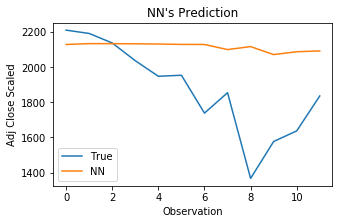

In [20]:
plt.figure(figsize=(5, 3))
plt.plot(y_test, label='True')
plt.plot(test_predict, label='NN')
plt.title("NN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();

## **Modelo univariado (con look_back)**

In [0]:
split_date = pd.Timestamp('2018-05-01')
dataset =  uni['KBD_MONTH']
train = dataset.loc[:split_date]
test = dataset.loc[split_date:]

In [0]:
def create_dataset(dataset2, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset2)-look_back-1):
		a = dataset2[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset2[i + look_back])
	return np.array(dataX), np.array(dataY)

In [0]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [82]:
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
model.fit(trainX, trainY, epochs=200, batch_size=2,callbacks=[early_stop], verbose=2)

Epoch 1/200
 - 1s - loss: 6779415.6055
Epoch 2/200
 - 0s - loss: 4284823.4576
Epoch 3/200
 - 0s - loss: 2719321.7534
Epoch 4/200
 - 0s - loss: 1591801.4891
Epoch 5/200
 - 0s - loss: 826036.6712
Epoch 6/200
 - 0s - loss: 378075.7540
Epoch 7/200
 - 0s - loss: 162010.3390
Epoch 8/200
 - 0s - loss: 78019.8858
Epoch 9/200
 - 0s - loss: 51820.5609
Epoch 10/200
 - 0s - loss: 45413.9399
Epoch 11/200
 - 0s - loss: 44338.9321
Epoch 12/200
 - 0s - loss: 44139.1828
Epoch 13/200
 - 0s - loss: 44123.4611
Epoch 14/200
 - 0s - loss: 44043.3112
Epoch 15/200
 - 0s - loss: 44268.5516
Epoch 16/200
 - 0s - loss: 44123.2914
Epoch 00016: early stopping


In [86]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 43994.65 MSE (209.75 RMSE)
Test Score: 39001.03 MSE (197.49 RMSE)


In [0]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

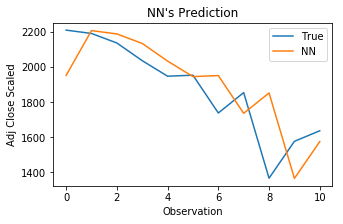

In [88]:
plt.figure(figsize=(5, 3))
plt.plot(testY, label='True')
plt.plot(testPredict, label='NN')
plt.title("NN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();

## **Modelo NN Multivariado (con variables significativas)**



In [0]:
from pandas import DataFrame
from pandas import read_csv
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from numpy import concatenate
from numpy import diff
import numpy
import pandas
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
# convert series to supervised learning
def series_to_supervised(data, n_in, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [0]:
df = data[['KBD_MONTH','API_PROMEDIO_PADD','PERCENT_UTILIZACION_PADD']]
values = df.values

In [0]:
# normalize features
values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed.drop(reframed.columns[[4,5]], axis=1, inplace=True)
values = reframed.values
values = reframed.values

In [0]:
n_train = -12 # last 12 months to test

train, test = values[0:n_train], values[n_train:]
# split into input (all columns exceptc last one) and outputs (last column)
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [93]:
test_X.shape

(12, 3)

In [94]:
neurons = 200
batch_size = 1
epochs = 70
def create_model():
    model = Sequential()
    model.add(Dense(neurons, input_dim=3, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    #history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, validation_data=(test_X, test_y), verbose=0, shuffle=False)
    history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, validation_data=(test_X, test_y),
                        callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)
    return model, history
model, history  = create_model()
model.summary()

Train on 220 samples, validate on 12 samples
Epoch 1/70
220/220 [==============================] - 1s 5ms/step - loss: 0.0208 - val_loss: 0.0290
Epoch 2/70
220/220 [==============================] - 1s 3ms/step - loss: 0.0212 - val_loss: 0.0286
Epoch 3/70
220/220 [==============================] - 1s 4ms/step - loss: 0.0202 - val_loss: 0.0261
Epoch 4/70
220/220 [==============================] - 1s 4ms/step - loss: 0.0195 - val_loss: 0.0243
Epoch 5/70
220/220 [==============================] - 1s 4ms/step - loss: 0.0189 - val_loss: 0.0239
Epoch 6/70
220/220 [==============================] - 1s 3ms/step - loss: 0.0185 - val_loss: 0.0219
Epoch 7/70
220/220 [==============================] - 1s 4ms/step - loss: 0.0180 - val_loss: 0.0213
Epoch 8/70
220/220 [==============================] - 1s 4ms/step - loss: 0.0177 - val_loss: 0.0208
Epoch 9/70
220/220 [==============================] - 1s 4ms/step - loss: 0.0174 - val_loss: 0.0202
Epoch 10/70
220/220 [==============================] - 

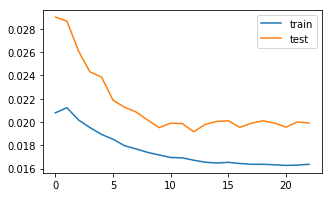

In [95]:
fig = plt.figure(figsize=(5, 3))
pyplot.clf()
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

yhat = model.predict(test_X)
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

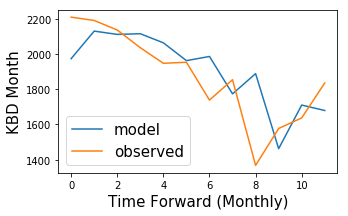

Train Mean Absolute Error:  143.3817751556433
Train Root Mean Square Error:  196.39226356764715
Test Mean Absolute Error:  143.3817751556433
Test Root Mean Squared Error:  196.39226356764715


In [96]:
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual - observed data
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
fig = plt.figure(figsize=(5, 3))
pyplot.clf()
pyplot.plot(inv_yhat, label="model")
pyplot.plot(inv_y, label="observed")
plt.ylabel('KBD Month', size=15)
plt.xlabel('Time Forward (Monthly)', size=15)
plt.legend(fontsize=15)
24
pyplot.show()
print('Train Mean Absolute Error: ', mean_absolute_error(inv_yhat, inv_y))
print('Train Root Mean Square Error: ', np.sqrt(mean_squared_error(inv_yhat, inv_y)))
print('Test Mean Absolute Error: ', mean_absolute_error(inv_yhat, inv_y))
print('Test Root Mean Squared Error: ', np.sqrt(mean_squared_error(inv_yhat, inv_y)))